In [3]:
import pandas as pd

# Load the spreadsheet to check sheet names
file_path = 'SAT7HL.xlsx'
xls = pd.ExcelFile(file_path)

# Load the sheet called 'tidy'
tidy_df = pd.read_excel(xls, sheet_name='tidy')

# Display the loaded data
#import ace_tools as tools; tools.display_dataframe_to_user(name="Tidy Data", dataframe=tidy_df)


In [10]:
import pingouin as pg
import pandas as pd

# Combine the two between-subjects factors into a single factor
tidy_df["Phenotype_Stimulus"] = tidy_df["Phenotype"] + "_" + tidy_df["Stimulus_Duration"].astype(str)

# Aggregate the data: Calculate the mean OM for each subject across blocks within each group
tidy_agg = tidy_df.groupby(["Animal_ID", "Phenotype_Stimulus"]).agg({"OM": "mean"}).reset_index()

# Ensure categorical data types
tidy_agg["Phenotype_Stimulus"] = tidy_agg["Phenotype_Stimulus"].astype('category')

# Run a between-subjects ANOVA (since blocks are averaged out)
anova_results = pg.anova(dv="OM", between="Phenotype_Stimulus", data=tidy_agg, detailed=True)

# Perform post-hoc tests with Bonferroni correction
post_hoc = pg.pairwise_ttests(dv="OM", between="Phenotype_Stimulus", data=tidy_agg, padjust="bonferroni")

# Display the ANOVA results and post-hoc test results
print(anova_results)
print(post_hoc)


C:\Users\pfh3221\AppData\Roaming\Python\Python38\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


               Source         SS   DF        MS         F     p-unc       np2
0  Phenotype_Stimulus   2.975501   11  0.270500  2.564808  0.005161  0.153154
1              Within  16.452699  156  0.105466       NaN       NaN       NaN
              Contrast      A       B  Paired  Parametric         T  \
0   Phenotype_Stimulus   GT_0   GT_25   False        True  0.767323   
1   Phenotype_Stimulus   GT_0   GT_50   False        True  1.347842   
2   Phenotype_Stimulus   GT_0  GT_500   False        True  0.000000   
3   Phenotype_Stimulus   GT_0    IN_0   False        True -1.702961   
4   Phenotype_Stimulus   GT_0   IN_25   False        True  0.171794   
..                 ...    ...     ...     ...         ...       ...   
61  Phenotype_Stimulus   ST_0   ST_50   False        True  2.685571   
62  Phenotype_Stimulus   ST_0  ST_500   False        True  2.175218   
63  Phenotype_Stimulus  ST_25   ST_50   False        True  0.795162   
64  Phenotype_Stimulus  ST_25  ST_500   False        Tru

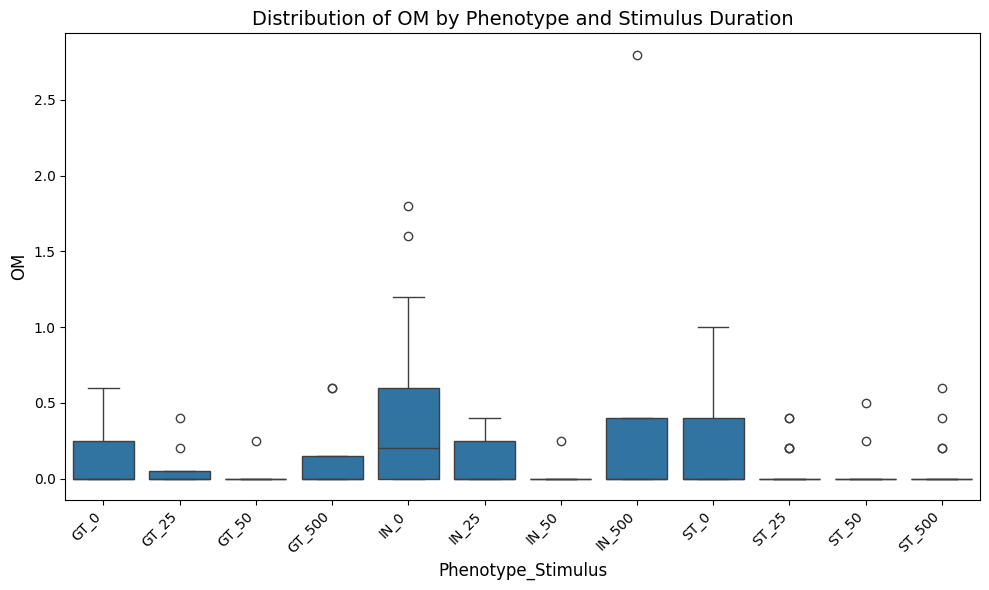

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to visualize OM values by Phenotype_Stimulus groups
plt.figure(figsize=(10, 6))
sns.boxplot(x="Phenotype_Stimulus", y="OM", data=tidy_agg)

# Add labels and title
plt.title("Distribution of OM by Phenotype and Stimulus Duration", fontsize=14)
plt.xlabel("Phenotype_Stimulus", fontsize=12)
plt.ylabel("OM", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


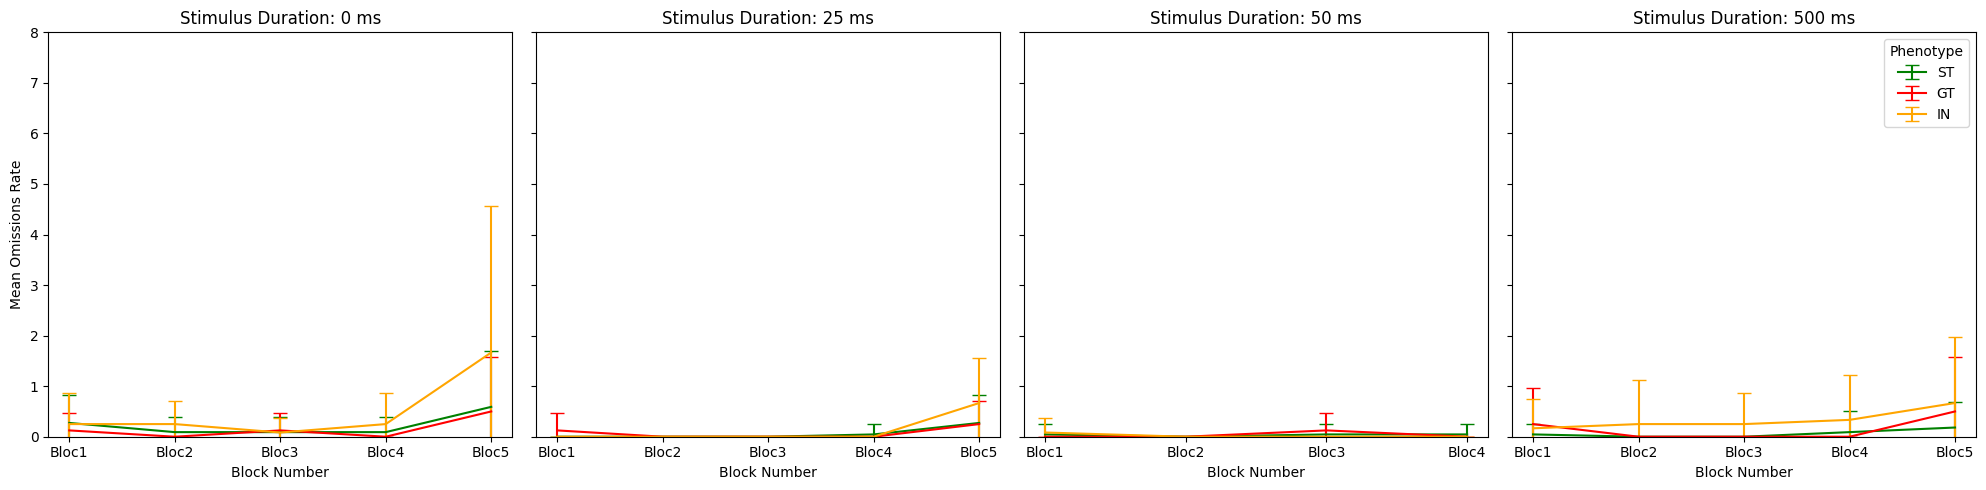

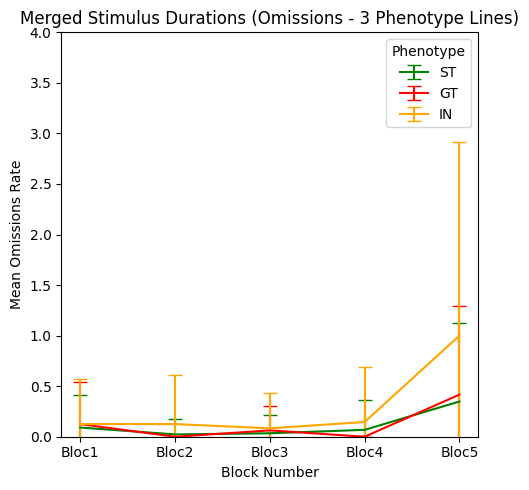

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the spreadsheet
file_path = 'SAT7HL.xlsx'
xls = pd.ExcelFile(file_path)

# Load the data from the 'tidy' sheet
tidy_df = pd.read_excel(xls, sheet_name='tidy')

# Filter out NaN in 'OM' as we are focusing on that metric
tidy_filtered = tidy_df.dropna(subset=['OM'])

# Get unique stimulus durations and phenotypes
stimulus_durations_om = tidy_filtered['Stimulus_Duration'].unique()
phenotypes = tidy_filtered['Phenotype'].unique()

# Define colors for phenotypes
phenotype_colors = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Group by Stimulus_Duration, Block_Number, and Phenotype, then calculate mean and std for OM
grouped_data_om = tidy_filtered.groupby(['Stimulus_Duration', 'Block_Number', 'Phenotype']).agg(
    mean_om=('OM', 'mean'),
    std_om=('OM', 'std')
).reset_index()

# Set the figure for 4 side-by-side plots for 'OM'
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Set common y-axis limits based on the data for 'OM'
y_min_om, y_max_om = tidy_filtered['OM'].min(), tidy_filtered['OM'].max()

# Plot each stimulus duration for OM
for ax, stimulus_duration in zip(axes, stimulus_durations_om):
    for phenotype in phenotypes:
        # Filter data by stimulus duration and phenotype
        data = grouped_data_om[(grouped_data_om['Stimulus_Duration'] == stimulus_duration) & 
                               (grouped_data_om['Phenotype'] == phenotype)]
        ax.errorbar(data['Block_Number'], data['mean_om'], yerr=data['std_om'], 
                    label=phenotype, color=phenotype_colors[phenotype], capsize=5)

    ax.set_title(f'Stimulus Duration: {stimulus_duration} ms')
    ax.set_xlabel('Block Number')
    ax.set_ylim(y_min_om, y_max_om)

axes[0].set_ylabel('Mean Omissions Rate')
plt.legend(title='Phenotype')

# Show the side-by-side plots for OM with 4 graphs
plt.tight_layout()
plt.show()

# Now, let's generate the merged plot (all stimulus durations combined) for OM
merged_data_om = tidy_filtered.groupby(['Block_Number', 'Phenotype']).agg(
    mean_om=('OM', 'mean'),
    std_om=('OM', 'std')
).reset_index()

# Plot the merged data with mean and std across all stimulus durations for OM
plt.figure(figsize=(5, 5))

for phenotype in phenotypes:
    data = merged_data_om[merged_data_om['Phenotype'] == phenotype]
    plt.errorbar(data['Block_Number'], data['mean_om'], yerr=data['std_om'], 
                 label=phenotype, color=phenotype_colors[phenotype], capsize=5)

plt.title('Merged Stimulus Durations (Omissions - 3 Phenotype Lines)')
plt.xlabel('Block Number')
plt.ylabel('Mean Omissions Rate')
#plt.ylim(y_min_om, y_max_om)
plt.ylim(0, 4)
plt.legend(title='Phenotype')
plt.tight_layout()
plt.show()
